<a href="https://colab.research.google.com/github/1999putrivj/PortfolioProject/blob/main/Improving_Employee_Retention_by_Predicting_Employee_Attrition_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GOAL : MENCARI FAKTOR FAKTOR APA SAJA YANG MENYEBABKAN RESIGNNYA KARYAWAN

#Data Preprocessing

In [ ]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Memuat dataset
df = pd.read_csv('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv')
df.head()


,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [ ]:
#  memeriksa jumlah pengamatan (baris) dan fitur (kolom) dalam dataset
df.shape

(287, 25)

Dataset berisi 287 baris dan 25 kolom

In [ ]:
# cek data tipe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [ ]:
# menemukan jumlah nilai unik setiap kolom

for column in df.columns:
  num_unique_values = df[column].nunique()
  print(f'Number of unique values in {column}: {num_unique_values}')

Number of unique values in Username: 285
Number of unique values in EnterpriseID: 287
Number of unique values in StatusPernikahan: 5
Number of unique values in JenisKelamin: 2
Number of unique values in StatusKepegawaian: 3
Number of unique values in Pekerjaan: 14
Number of unique values in JenjangKarir: 3
Number of unique values in PerformancePegawai: 5
Number of unique values in AsalDaerah: 5
Number of unique values in HiringPlatform: 9
Number of unique values in SkorSurveyEngagement: 5
Number of unique values in SkorKepuasanPegawai: 5
Number of unique values in JumlahKeikutsertaanProjek: 9
Number of unique values in JumlahKeterlambatanSebulanTerakhir: 7
Number of unique values in JumlahKetidakhadiran: 22
Number of unique values in NomorHP: 287
Number of unique values in Email: 287
Number of unique values in TingkatPendidikan: 3
Number of unique values in PernahBekerja: 2
Number of unique values in IkutProgramLOP: 2
Number of unique values in AlasanResign: 11
Number of unique values 

In [ ]:
# memeriksa nilai null menggunakan df.isnull()
df.isnull().sum()


,0
Username,0
EnterpriseID,0
StatusPernikahan,0
JenisKelamin,0
StatusKepegawaian,0
Pekerjaan,0
JenjangKarir,0
PerformancePegawai,0
AsalDaerah,0
HiringPlatform,0


In [ ]:
# import library untuk visualisasi nilai hilang
import missingno as msno

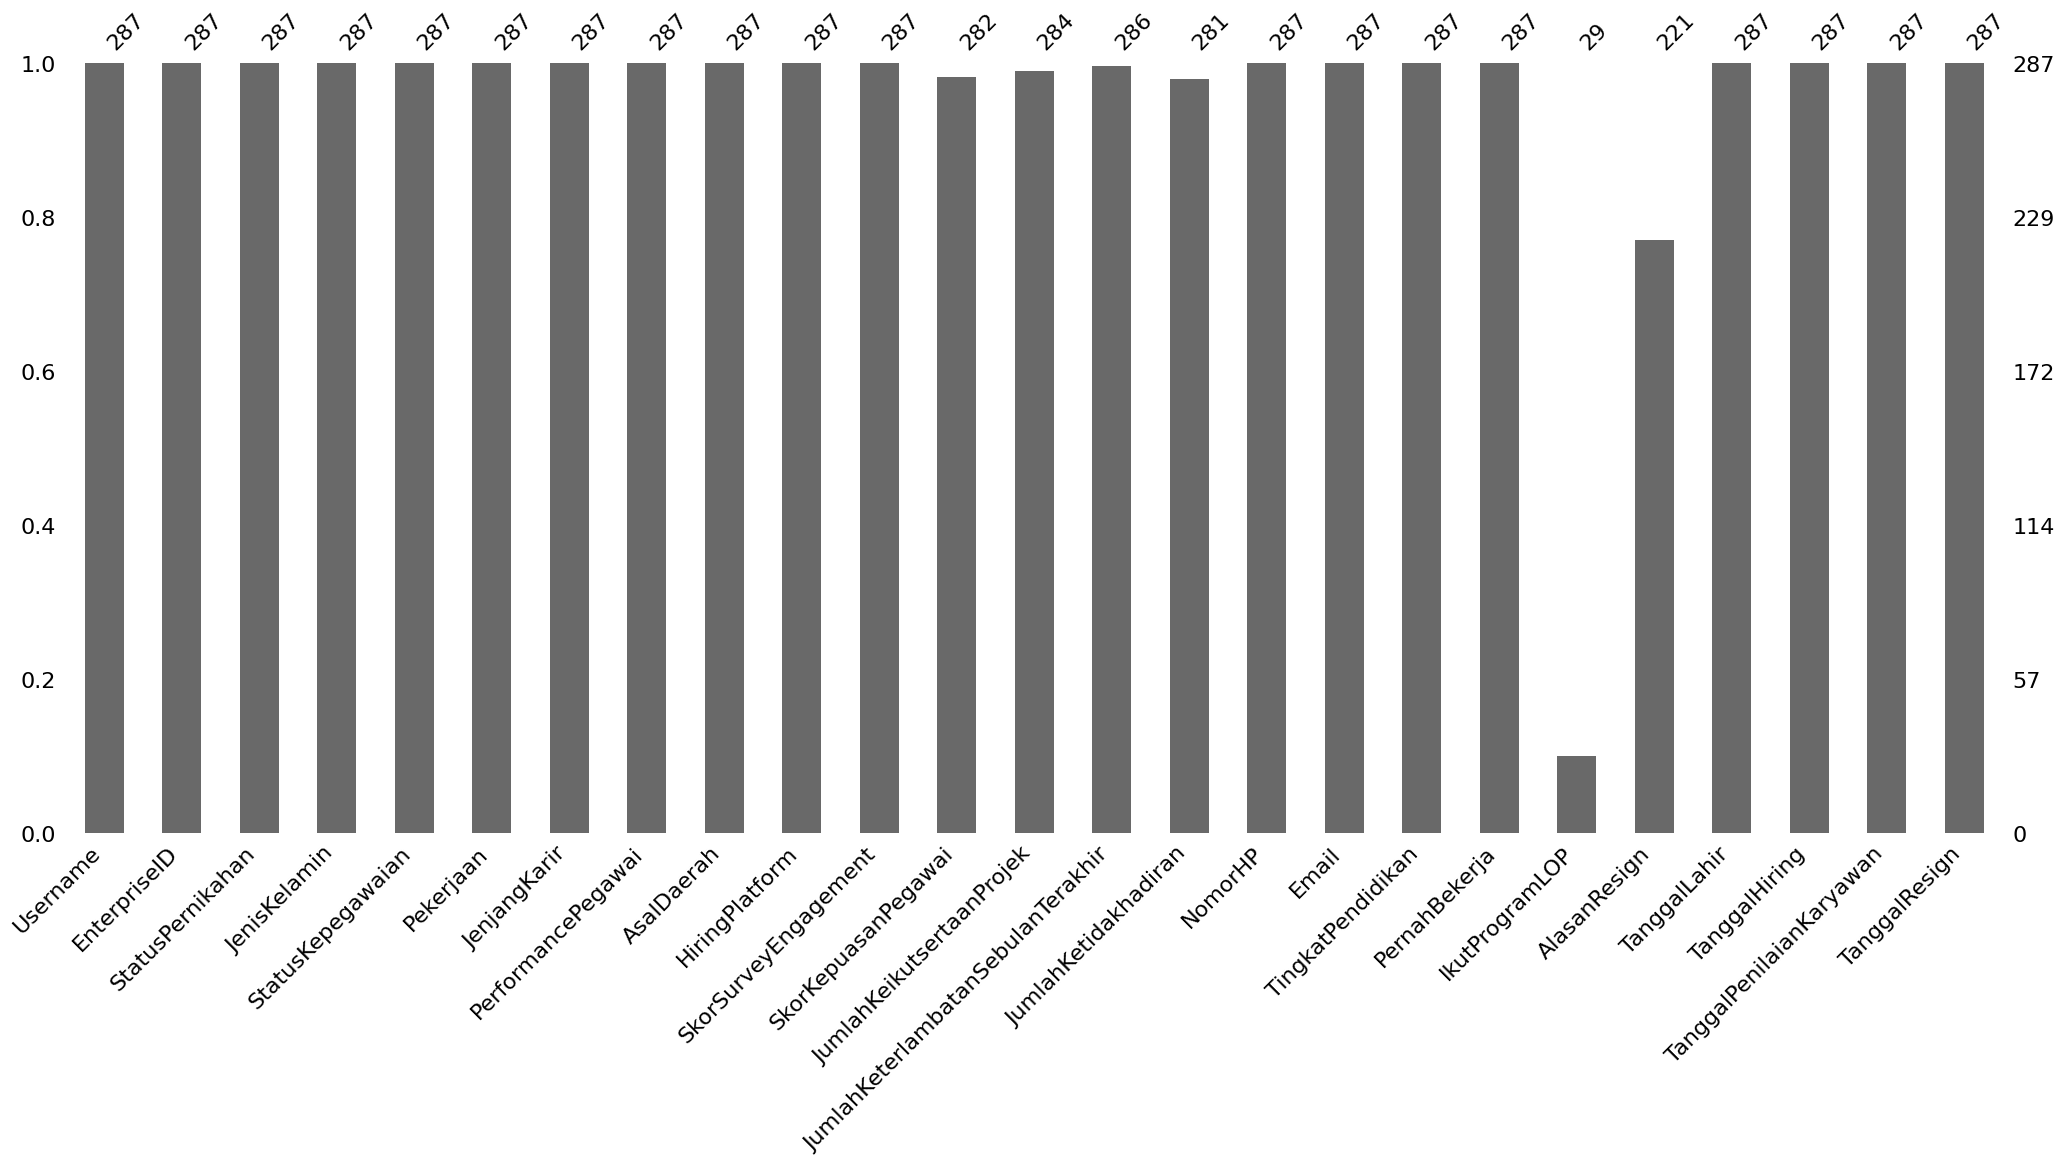

In [ ]:
# Bar plot untuk melihat jumlah nilai hilang per kolom
msno.bar(df)

# Menyimpan gambar box plot
plt.savefig('boxplot_missing_value.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Mendownload file yang telah disimpan
files.download('boxplot_missing_value.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Kolom "IkutProgramLOP" memiliki bar yang sangat rendah (29), menunjukkan banyak data yang hilang dalam kolom ini.
Kolom "AlasanResign" memiliki bar dengan nilai sekitar 221, yang berarti ada sejumlah missing values (data yang hilang) dalam kolom ini.

In [ ]:
# Imputasi untuk 'SkorKepuasanPegawai' (Fitur Numerik) dengan mean
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].mean(), inplace=True)

In [ ]:
# Imputasi untuk 'JumlahKeikutsertaanProjek' (Fitur Numerik) dengan mean
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].mean(), inplace=True)

In [ ]:
# Imputasi untuk 'JumlahKeterlambatanSebulanTerakhir' (Fitur Numerik) dengan mean
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].mean(), inplace=True)

In [ ]:
# Imputasi untuk 'JumlahKetidakhadiran' (Fitur Numerik) dengan mean
df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].mean(), inplace=True)

In [ ]:
# Imputasi untuk 'IkutProgramLOP' (Fitur Numerik) dengan mean
df['IkutProgramLOP'].fillna(df['IkutProgramLOP'].mean(), inplace=True)

In [ ]:
# Imputasi untuk 'AlasanResign' (Fitur kategorik) dengan mode
df['AlasanResign'].fillna(df['AlasanResign'].mode()[0], inplace=True)

In [ ]:
# memeriksa dataset untuk nilai yang hilang lagi untuk memastikan bahwa semua nilai yang hilang telah ditangani
missing_after_imputation = df.isnull().sum()
print("Missing values after imputation:")
print(missing_after_imputation)

Missing values after imputation:
Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
IkutProgramLOP                        0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
Tanggal

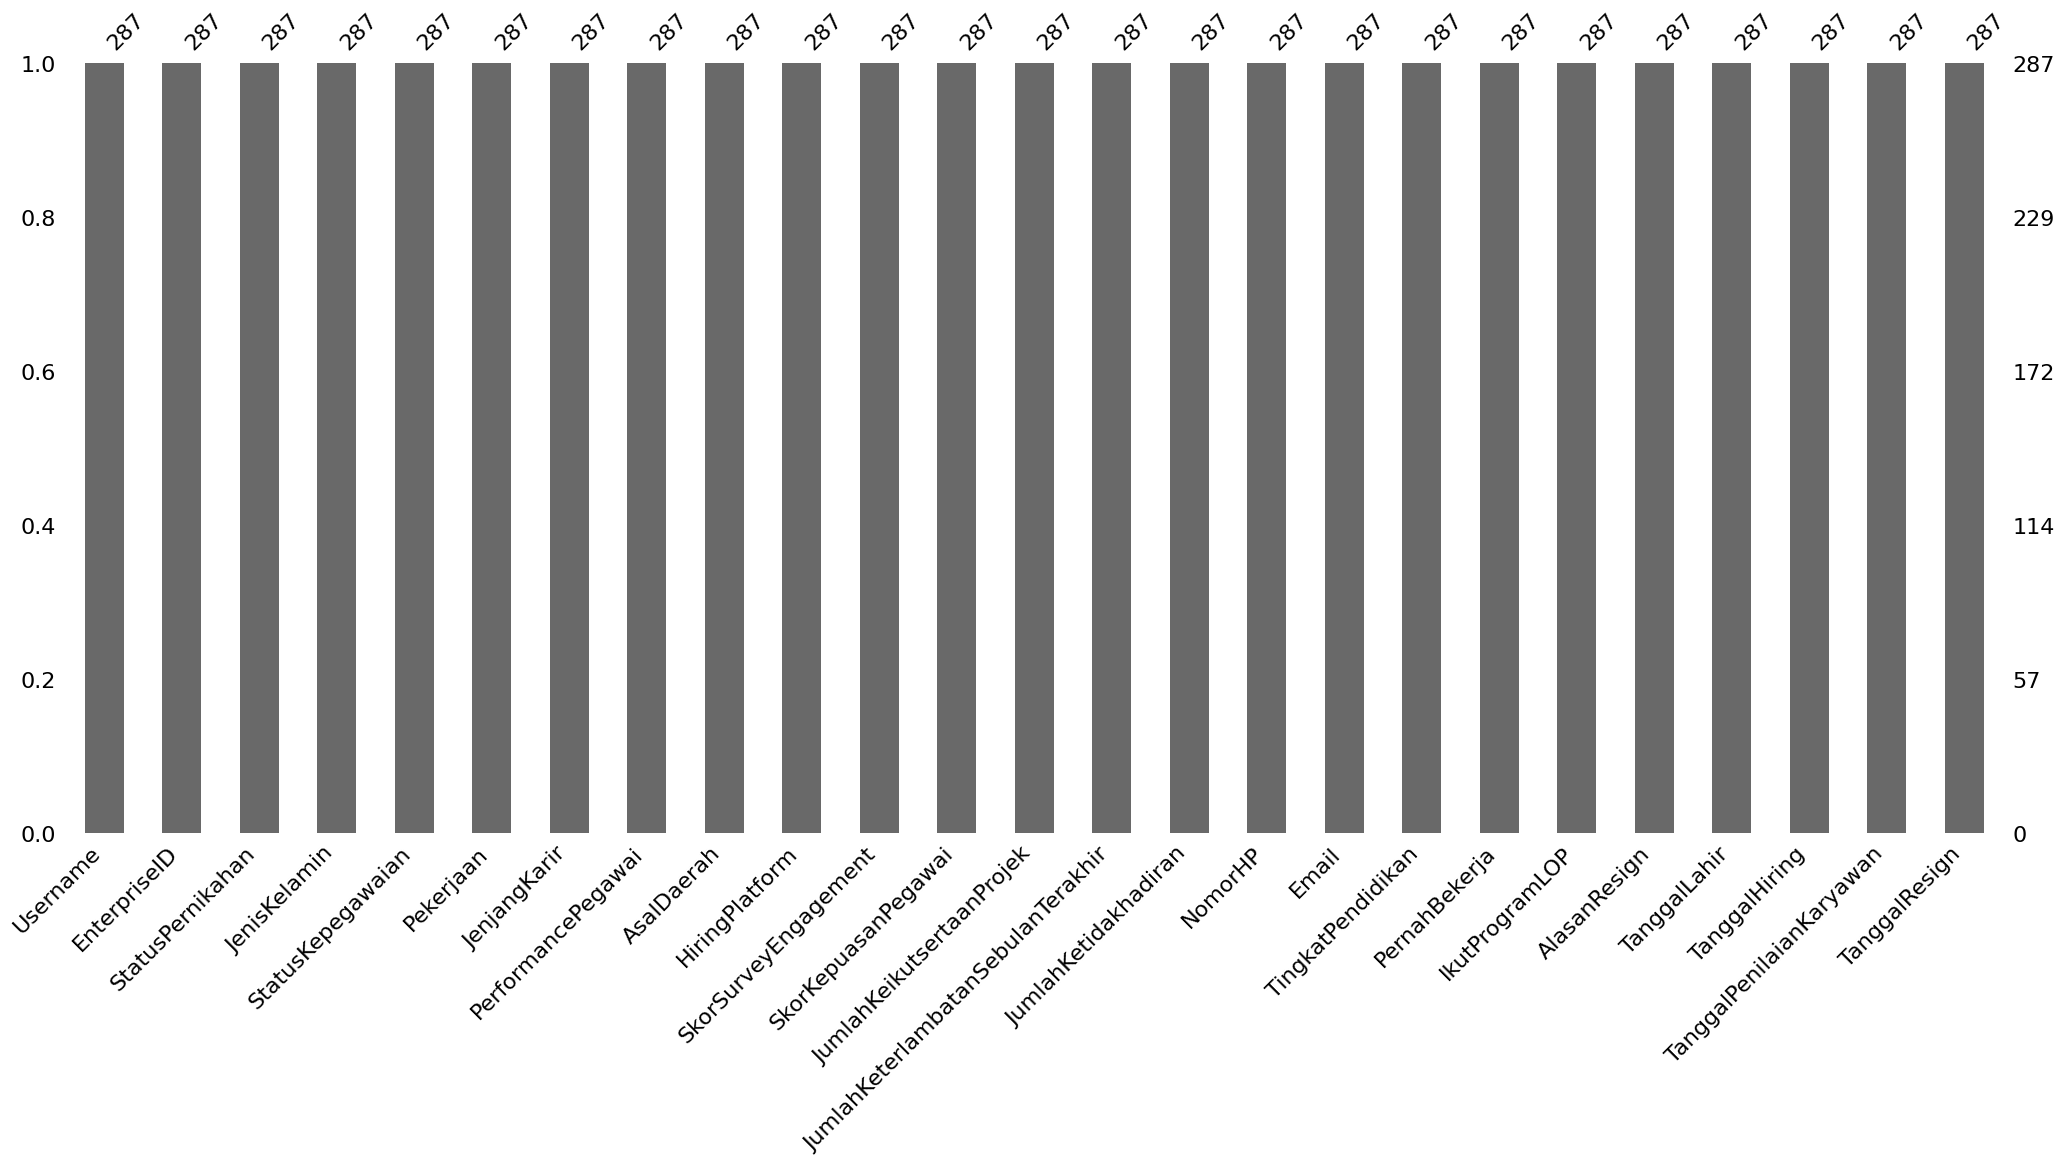

In [ ]:
# Bar plot untuk melihat jumlah nilai hilang per kolom
msno.bar(df)

# Menyimpan gambar box plot
plt.savefig('boxplot_setelah_dilakukan_imputasi.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Mendownload file yang telah disimpan

from google.colab import files
files.download('boxplot_setelah_dilakukan_imputasi.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Menghapus Fitur yang Tidak Relevan
# idetifikasi terlebih dahulu fitur dependen dan independen
df = df.drop('Username', axis=1)
df = df.drop('EnterpriseID', axis=1)

Variabel Dependen:
TanggalResign
PerformancePegawai
SkorSurveyEngagement
SkorKepuasanPegawai

Variabel Independen:
StatusPernikahan
JenisKelamin
StatusKepegawaian
Pekerjaan
JenjangKarir
AsalDaerah
HiringPlatform
JumlahKeterlambatanSebulanTerakhir
JumlahKetidakhadiran
TingkatPendidikan
TanggalHiring
TanggalPenilaianKaryawan
AlasanResign

Untuk mempertahankan karyawan yang potensial, fokus utama adalah memahami hubungan antara variabel-variabel independen seperti Status Kepegawaian, Jumlah Keterlambatan, Jenjang Karir, dan Tingkat Pendidikan, dengan variabel dependen seperti Tanggal Resign atau Kinerja Karyawan.


In [ ]:
print(df.columns)

Index(['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan',
       'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform',
       'SkorSurveyEngagement', 'SkorKepuasanPegawai',
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran', 'NomorHP', 'Email', 'TingkatPendidikan',
       'PernahBekerja', 'IkutProgramLOP', 'AlasanResign', 'TanggalLahir',
       'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign'],
      dtype='object')


In [ ]:
# Menghapus Baris Duplikat
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [StatusPernikahan, JenisKelamin, StatusKepegawaian, Pekerjaan, JenjangKarir, PerformancePegawai, AsalDaerah, HiringPlatform, SkorSurveyEngagement, SkorKepuasanPegawai, JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir, JumlahKetidakhadiran, NomorHP, Email, TingkatPendidikan, PernahBekerja, IkutProgramLOP, AlasanResign, TanggalLahir, TanggalHiring, TanggalPenilaianKaryawan, TanggalResign]
Index: []

[0 rows x 23 columns]


dari data tersebut tidak ditemukan duplikat

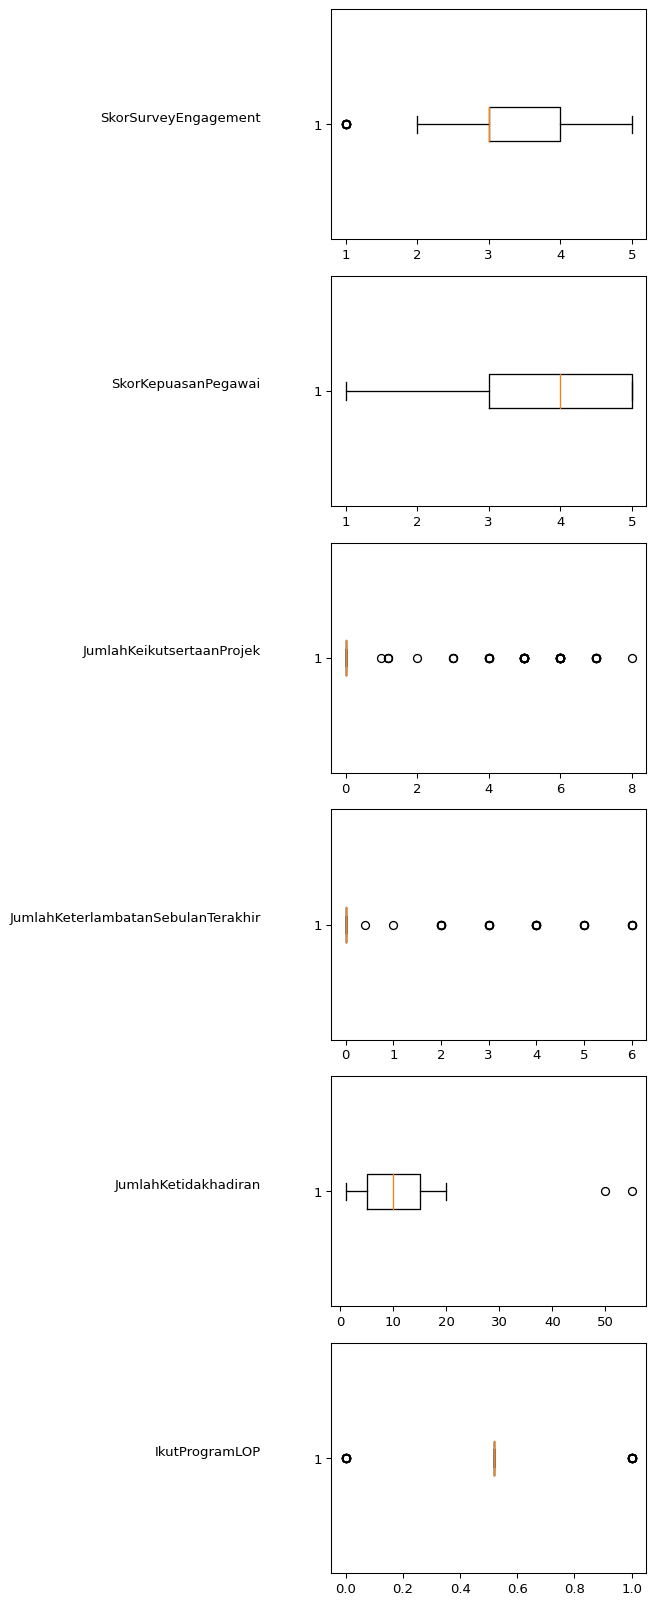

In [ ]:
# cek outliers
# Box Plots
fig, axs = plt.subplots(6, 1,dpi=95, figsize=(7,17))
i = 0
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]): # Check if the column is numeric
        axs[i].boxplot(df[col], vert=False)
        axs[i].set_ylabel(col, rotation=0, labelpad=40, ha='right')
        i+=1

# Mengatur tata letak agar label tidak tumpang tindih
plt.tight_layout()

# Menyimpan gambar boxplot
plt.savefig('boxplot_outlier.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Mendownload file yang telah disimpan
files.download('boxplot_outlier.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SkorSurveyEngagement:

    Median (garis di dalam kotak) sekitar 3,5.
    Rentang interkuartil (IQR) mencakup skor sekitar 2,5 hingga 4,5.
    Ada outlier di bawah 2.

SkorKepuasanPegawai:

    Median lebih rendah, sekitar 2.
    IQR mencakup skor dari 1 hingga hampir 4.
    Tidak ada outlier yang jelas.

JumlahKeikutsertaanProjek:

    Nilai distribusi sangat sempit, mayoritas data berada di 0 dan 1.
    Beberapa outlier (bulatan) di angka 2 hingga 7, menunjukkan ada karyawan yang terlibat dalam proyek dalam jumlah yang signifikan lebih besar daripada yang lain.

JumlahKeterlambatanSebulanTerakhir:

    Sebagian besar nilai adalah nol.
    Ada beberapa outlier hingga 6 keterlambatan.

JumlahKetidakhadiran:

    Median di sekitar 10 hari.
    Ada rentang data yang cukup lebar, dengan outlier di angka 50 hari.
    IQR antara 5 hingga 15 hari.

IkutProgramLOP:

    Median di sekitar 0,5, menunjukkan bahwa sebagian besar peserta berada di antara 0 dan 1 dalam keikutsertaan program LOP.
    Ada outlier di angka 0 dan 1.

In [ ]:
# Analisis Statistik
# fitur kategorial juga diperlihatkan
descriptive_stats = df.describe(include="all")
# Simpan hasil analisis deskriptif ke file Excel
descriptive_stats.to_excel('descriptive_stats.xlsx')

descriptive_stats

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
count,287,287,287,287,287,287,287,287,287.000000,287.000000,...,287,287,287,287,287.000000,287,287,287,287,287
unique,5,2,3,14,3,5,5,9,NaN,NaN,...,287,287,3,2,NaN,11,284,97,127,53
top,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,NaN,NaN,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Sarjana,1,NaN,masih_bekerja,1987-06-14,2011-01-10,2020-1-14,-
freq,132,167,217,109,169,85,72,85,NaN,NaN,...,1,1,176,286,NaN,198,2,12,17,198
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.101045,3.904255,...,NaN,NaN,NaN,NaN,0.517241,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.836388,0.905336,...,NaN,NaN,NaN,NaN,0.159121,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,...,NaN,NaN,NaN,NaN,0.517241,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,...,NaN,NaN,NaN,NaN,0.517241,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,...,NaN,NaN,NaN,NaN,0.517241,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Download file Excel
from google.colab import files
files.download('descriptive_stats.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Bagaimana distribusi skor kinerja karyawan? Apakah terdapat karyawan dengan kinerja yang sangat rendah atau sangat tinggi?

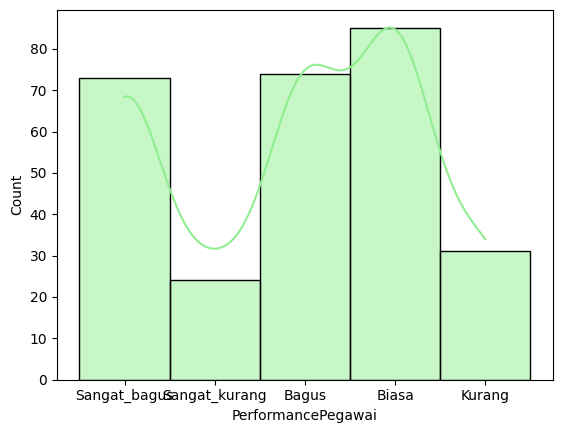

In [ ]:
# analisis univariate
sns.histplot(df['PerformancePegawai'], bins=15, kde=True, color='lightgreen')

# Menyimpan gambar histplot
plt.savefig('histplot_PerformancePegawai.png', dpi=300, bbox_inches='tight')

plt.show()

Sangat_bagus: Terdapat sekitar 70-80 karyawan yang memiliki kinerja "Sangat_bagus".
Sangat_kurang: Hanya sedikit karyawan (kurang dari 20) yang dikategorikan sebagai "Sangat_kurang".
Bagus: Sekitar 70-80 karyawan memiliki kinerja yang dikategorikan "Bagus".
Biasa: Jumlah karyawan dengan kinerja "Biasa" paling tinggi, sekitar 85-90.
Kurang: Sekitar 40 karyawan yang masuk kategori kinerja "Kurang".

Mayoritas karyawan berada dalam kategori Biasa dan Sangat_bagus, sementara sangat sedikit karyawan yang berada di kategori Sangat_kurang.
Kurva KDE menunjukkan bahwa data kinerja karyawan agak terpusat di tengah-tengah antara kategori "Biasa" dan "Sangat_bagus", dengan sedikit penurunan di kategori "Sangat_kurang".

Berapa rata-rata dan median dari kinerja pegawai? Apakah ada outlier?

In [ ]:
# analisis univariate
# Buat mapping untuk mengonversi kategori ke numerik
mapping_kinerja = {
    'Sangat_bagus': 5,
    'Bagus': 4,
    'Biasa': 3,
    'Kurang': 2,
    'Sangat_kurang': 1
}

# Terapkan mapping ke DataFrame
df['PerformancePegawai_Numeric'] = df['PerformancePegawai'].map(mapping_kinerja)

# Menghitung rata-rata dan median
rata_rata = df['PerformancePegawai_Numeric'].mean()
median = df['PerformancePegawai_Numeric'].median()

print(f"Rata-rata kinerja pegawai: {rata_rata}")
print(f"Median kinerja pegawai: {median}")



Rata-rata kinerja pegawai: 3.491289198606272
Median kinerja pegawai: 4.0


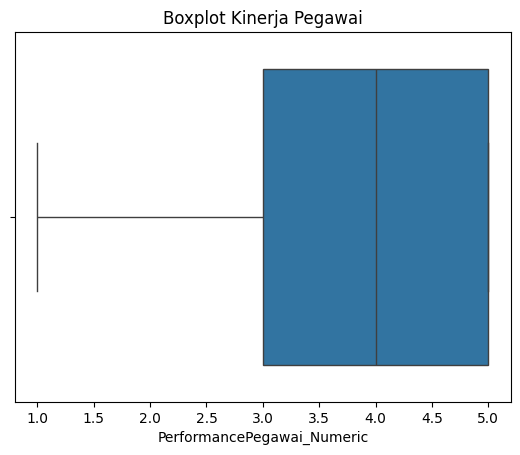

In [ ]:
# analisis univariate
# Membuat boxplot untuk PerformancePegawai_Numeric
sns.boxplot(x=df['PerformancePegawai_Numeric'])
plt.title('Boxplot Kinerja Pegawai')

# Menyimpan gambar boxplot
plt.savefig('boxplot_PerformancePegawai_Numeric.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Mendownload file yang telah disimpan

from google.colab import files
files.download('boxplot_PerformancePegawai_Numeric.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

kita dapat menyimpulkan beberapa hal mengenai kinerja pegawai bahwa:
Kinerja pegawai secara keseluruhan berada dalam rentang antara sekitar 1 hingga 5.
Sebagian besar pegawai memiliki kinerja yang berada di sekitar nilai 3, Ini terlihat dari letak median yang berada di sekitar nilai tersebut.
Tidak adanya outlier menunjukkan bahwa tidak ada kinerja pegawai yang sangat jauh berbeda dari yang lainnya

Apakah ada perbedaan kinerja yang signifikan antara kelompok pegawai (misalnya, berdasarkan IkutProgramLOP, StatusKepegawaian, StatusPernikahan)?
Faktor apa saja yang dapat mempengaruhi kinerja pegawai?

In [ ]:
import scipy.stats as stats

# Bagi data berdasarkan kelompok
grouped = df.groupby('StatusKepegawaian')['PerformancePegawai_Numeric']

# Lakukan uji ANOVA
f_statistic, p_value = stats.f_oneway(grouped.get_group('Outsource'), grouped.get_group('FullTime'), grouped.get_group('Internship'))

print('F-statistic:', f_statistic)
print('p-value:', p_value)

# Interpretasi hasil
alpha = 0.05
if p_value <= alpha:
    print('Tolak H0. Terdapat perbedaan signifikan antara StatusKepegawaian dengan kinerja pegawai.')
else:
    print('Gagal tolak H0. Tidak ada perbedaan signifikan antara StatusKepegawaian dengan kinerja pegawai.')

F-statistic: 0.93603190192926
p-value: 0.39338742548611394
Gagal tolak H0. Tidak ada perbedaan signifikan antara StatusKepegawaian dengan kinerja pegawai.


Berdasarkan nilai-nilai di atas, kita gagal menolak hipotesis nol. Ini berarti tidak ada perbedaan yang signifikan antara kolom StatusKepegawaian dengan kinerja pegawai.

In [ ]:
import scipy.stats as stats

# Bagi data berdasarkan kelompok
grouped = df.groupby('IkutProgramLOP')['PerformancePegawai_Numeric']

# Lakukan uji ANOVA
#  Mengonversi kunci ke tipe data yang benar
f_statistic, p_value = stats.f_oneway(grouped.get_group(1.0), grouped.get_group(0.0))

print('F-statistic:', f_statistic)
print('p-value:', p_value)

# Interpretasi hasil
alpha = 0.05
if p_value <= alpha:
    print('Tolak H0. Terdapat perbedaan signifikan antara IkutProgramLOP dan tidak pada nilai perfom pegawai.')
else:
    print('Gagal tolak H0. Tidak ada perbedaan signifikan antara IkutProgramLOP dan tidak pada nilai perfom pegawai.')

F-statistic: 0.00910547171402074
p-value: 0.9246838742593162
Gagal tolak H0. Tidak ada perbedaan signifikan antara IkutProgramLOP dan tidak pada nilai perfom pegawai.


Berdasarkan nilai-nilai di atas, kita gagal menolak hipotesis nol. Ini berarti tidak ada perbedaan yang signifikan antara pegawai yang mengikuti/tidak program LOP dengan kinerja pegawai.

In [ ]:
import scipy.stats as stats

# Bagi data berdasarkan kelompok
grouped = df.groupby('StatusPernikahan')['PerformancePegawai_Numeric']

# Lakukan uji ANOVA
f_statistic, p_value = stats.f_oneway(grouped.get_group('Belum_menikah'), grouped.get_group('Menikah'), grouped.get_group('Bercerai'), grouped.get_group('Lainnya'), grouped.get_group('-'))

print('F-statistic:', f_statistic)
print('p-value:', p_value)

# Interpretasi hasil
alpha = 0.05
if p_value <= alpha:
    print('Tolak H0. Terdapat perbedaan signifikan antara StatusPernikahan  dengan kinerja pegawai.')
else:
    print('Gagal tolak H0. Tidak ada perbedaan signifikan antara StatusPernikahan dengan kinerja pegawai.')

F-statistic: 1.6439242960421914
p-value: 0.16333647840881496
Gagal tolak H0. Tidak ada perbedaan signifikan antara StatusPernikahan dengan kinerja pegawai.


Berdasarkan nilai-nilai di atas, kita gagal menolak hipotesis nol. Ini berarti tidak ada perbedaan yang signifikan antara kolom StatusPernikahan dengan kinerja pegawai

Bagaimana distribusi skor engagement (keterlibatan) karyawan dengan perusahaan? Apakah mayoritas karyawan merasa sangat terlibat atau tidak terlibat?

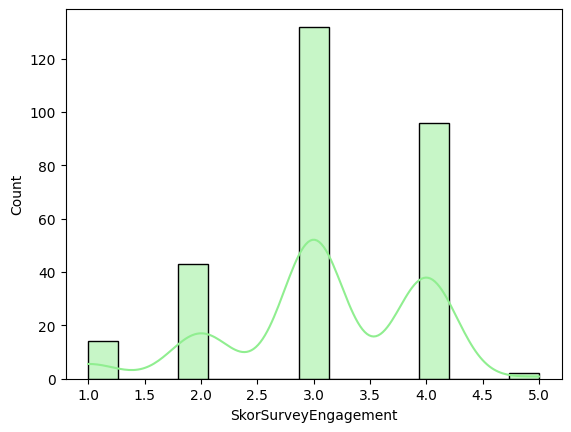

In [ ]:
# analisis univariate
sns.histplot(df['SkorSurveyEngagement'], bins=15, kde=True, color='lightgreen')

# Menyimpan gambar histplot
plt.savefig('histplot_SkorSurveyEngagement.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Mendownload file yang telah disimpan

from google.colab import files
files.download('histplot_SkorSurveyEngagement.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

    Ada empat kelompok utama yang menonjol:
        Skor 1.0: Jumlah pegawai dengan skor ini relatif sedikit (sekitar 20 orang).
        Skor 2.0: Ada sekitar 40 pegawai dengan skor ini.
        Skor 3.0: Merupakan nilai paling sering muncul dengan lebih dari 120 pegawai.
        Skor 4.0: Mendekati jumlah 80 pegawai.
    Hampir tidak ada pegawai dengan skor 5.0, yang menunjukkan bahwa sedikit sekali pegawai yang mendapatkan skor tertinggi.

    Grafik KDE menunjukkan distribusi yang multi-modal (terdapat lebih dari satu puncak), yang berarti ada beberapa kelompok pegawai dengan tingkat engagement yang berbeda-beda.

    Sebagian besar pegawai berada di kategori engagement menengah hingga tinggi (sekitar 3.0 dan 4.0), menunjukkan bahwa mayoritas pegawai memiliki tingkat keterlibatan yang cukup baik.
    Hanya sedikit pegawai yang memiliki engagement sangat rendah (skor 1.0), dan hampir tidak ada yang berada di tingkat engagement maksimal (5.0).

Apakah terdapat perbedaan yang signifikan antara engagement karyawan dengan status kepegawaian?

In [ ]:
# Bagi data berdasarkan kelompok
grouped = df.groupby('StatusKepegawaian')['SkorSurveyEngagement']

# Lakukan uji ANOVA
f_statistic, p_value = stats.f_oneway(grouped.get_group('Outsource'), grouped.get_group('FullTime'), grouped.get_group('Internship'))

print('F-statistic:', f_statistic)
print('p-value:', p_value)

# Interpretasi hasil
alpha = 0.05
if p_value <= alpha:
    print('Tolak H0. Terdapat perbedaan signifikan antara StatusKepegawaian dengan SkorSurveyEngagement.')
else:
    print('Gagal tolak H0. Tidak ada perbedaan signifikan antara StatusKepegawaian dengan SkorSurveyEngagement.')

F-statistic: 0.5772481107903851
p-value: 0.562098606959363
Gagal tolak H0. Tidak ada perbedaan signifikan antara StatusKepegawaian dengan SkorSurveyEngagement.


Berdasarkan nilai-nilai di atas, kita gagal menolak hipotesis nol. Ini berarti tidak ada perbedaan yang signifikan antara kolom StatusKepegawaian dengan SkorSurveyEngagement

Bagaimana tingkat kepuasan karyawan terhadap perusahaan? Berapa banyak karyawan yang puas vs tidak puas?

Kepuasan_pegawai
Puas          277
Tidak Puas     10
Name: count, dtype: int64


<ipython-input-29-f267594e50a1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kepuasan_pegawai', data=df, palette='Set2')


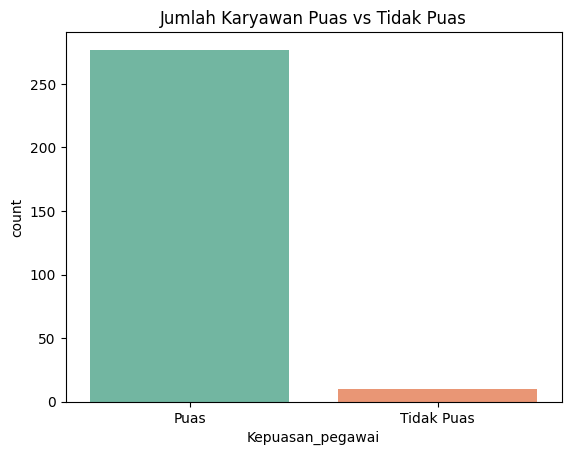

In [ ]:
# Definisikan kriteria puas dan tidak puas
df['Kepuasan_pegawai'] = df['SkorKepuasanPegawai'].apply(lambda x: 'Puas' if x >= 3 else 'Tidak Puas')

# Hitung jumlah karyawan yang puas vs tidak puas
puas_count = df['Kepuasan_pegawai'].value_counts()

print(puas_count)

# Visualisasi bar chart
sns.countplot(x='Kepuasan_pegawai', data=df, palette='Set2')
plt.title('Jumlah Karyawan Puas vs Tidak Puas')

# Menyimpan gambar bar chart
plt.savefig('barchart_SkorKepuasanPegawai.png', dpi=300, bbox_inches='tight')

plt.show()



In [ ]:
files.download('barchart_SkorKepuasanPegawai.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mayoritas karyawan berada dalam kategori "Puas". Pada sumbu vertikal (count), terlihat bahwa jumlah karyawan yang puas lebih dari 250 orang.
Sangat sedikit karyawan yang masuk dalam kategori "Tidak Puas". Berdasarkan grafik, jumlahnya di bawah 50 orang.


Sebagian besar karyawan merasa puas, dengan hanya sedikit yang tidak puas. Ini mengindikasikan bahwa tingkat kepuasan di tempat kerja ini cukup tinggi.

Berapa jumlah keterlambatan rata-rata yang dimiliki karyawan dalam sebulan terakhir?

In [ ]:
# Hitung rata-rata jumlah keterlambatan dalam sebulan terakhir
rata_rata_keterlambatan = df['JumlahKeterlambatanSebulanTerakhir'].mean()

print(f'Rata-rata keterlambatan karyawan dalam sebulan terakhir: {rata_rata_keterlambatan:.2f} kali')


Rata-rata keterlambatan karyawan dalam sebulan terakhir: 0.41 kali


Dari hasil yang dapatkan, yaitu rata-rata keterlambatan karyawan dalam sebulan terakhir adalah 0.41 kali, ini menunjukkan bahwa secara umum karyawan jarang terlambat.

Apakah ada outlier dalam jumlah keterlambatan karyawan?

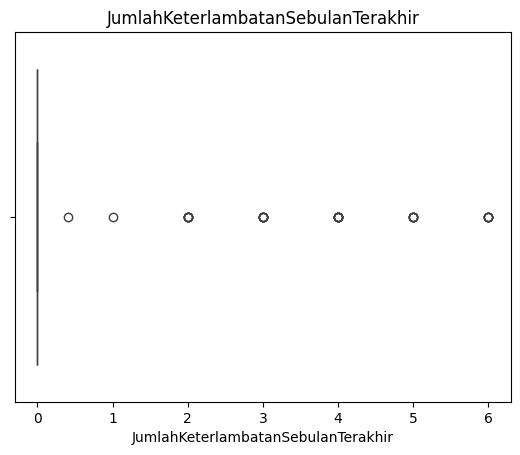

In [ ]:
# Membuat boxplot untuk PerformancePegawai_Numeric
sns.boxplot(x=df['JumlahKeterlambatanSebulanTerakhir'])
plt.title('JumlahKeterlambatanSebulanTerakhir')

# Menyimpan gambar boxplot
plt.savefig('boxplot_JumlahKeterlambatanSebulanTerakhir.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
files.download('boxplot_JumlahKeterlambatanSebulanTerakhir.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Terdapat beberapa titik yang terletak jauh dari garis boxplot, yang mengindikasikan adanya outliers. Ini berarti ada beberapa karyawan yang mengalami keterlambatan yang jauh lebih tinggi dibandingkan yang lainnya.
Tidak terlihat adanya garis median di dalam box, hal ini mengindikasikan bahwa distribusi data cenderung miring (skewed). Mayoritas karyawan mungkin memiliki jumlah keterlambatan yang sangat rendah

Berapa persen karyawan yang tidak pernah terlambat?

In [ ]:
# Menghitung jumlah karyawan yang tidak pernah terlambat
jumlah_tidak_terlambat = df[df['JumlahKeterlambatanSebulanTerakhir'] == 0].shape[0]

# Menghitung total karyawan
total_karyawan = df.shape[0]

# Menghitung persentase karyawan yang tidak pernah terlambat
persentase_tidak_terlambat = (jumlah_tidak_terlambat / total_karyawan) * 100

print(f"Persentase karyawan yang tidak pernah terlambat: {persentase_tidak_terlambat:.2f}%")


Persentase karyawan yang tidak pernah terlambat: 88.85%


<ipython-input-33-e5569b3a0679>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Tidak Terlambat', 'Terlambat'], y=[persentase_tidak_terlambat, 100 - persentase_tidak_terlambat], palette='viridis')


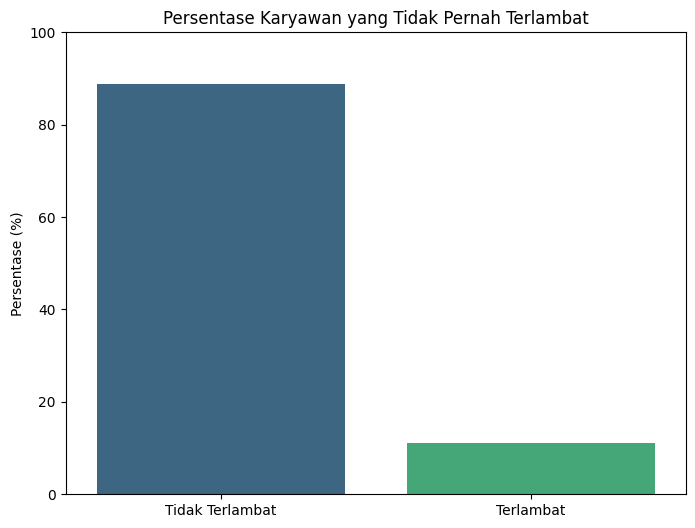

In [ ]:
# Menghitung persentase karyawan yang tidak pernah terlambat
df['persentase_tidak_terlambat'] = df['JumlahKeterlambatanSebulanTerakhir'] == 0
persentase_tidak_terlambat = df['persentase_tidak_terlambat'].mean() * 100

# Membuat plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Tidak Terlambat', 'Terlambat'], y=[persentase_tidak_terlambat, 100 - persentase_tidak_terlambat], palette='viridis')
plt.ylabel('Persentase (%)')
plt.title('Persentase Karyawan yang Tidak Pernah Terlambat')
plt.ylim(0, 100)

# Menyimpan gambar plot
plt.savefig('plot_persentase_karyawan_tidak_terlambat.png', dpi=300, bbox_inches='tight')

# Menampilkan plot
plt.show()

In [ ]:
files.download('plot_persentase_karyawan_tidak_terlambat.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Berdasarkan visualisasi ini, dapat disimpulkan bahwa perusahaan ini memiliki budaya kerja yang baik terkait dengan ketepatan waktu. Mayoritas karyawannya menunjukkan komitmen yang tinggi terhadap pekerjaan dengan selalu datang tepat waktu.

Bagaimana distribusi ketidakhadiran karyawan?

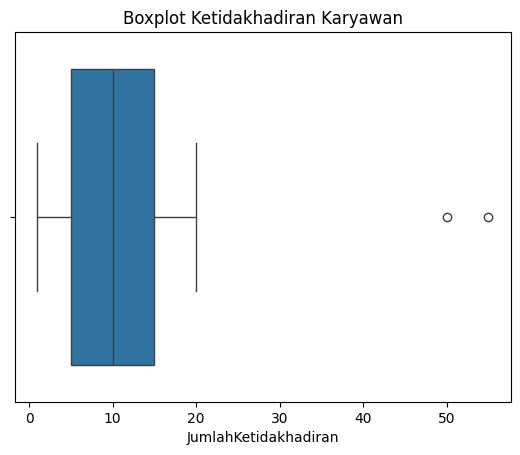

In [ ]:
# analisis univariate
# Membuat boxplot untuk JumlahKetidakhadiran
sns.boxplot(x=df['JumlahKetidakhadiran'])
plt.title('Boxplot Ketidakhadiran Karyawan')

# Menyimpan gambar boxplot
plt.savefig('Boxplot_Ketidakhadiran_Karyawan.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
from google.colab import files
files.download('Boxplot_Ketidakhadiran_Karyawan.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sebagian besar karyawan memiliki jumlah ketidakhadiran antara sekitar 5 hingga 15 hari dalam setahun. Ini terlihat dari panjang kotak yang cukup signifikan di rentang tersebut.
Median ketidakhadiran berada di sekitar 10 hari. Artinya, setengah dari karyawan memiliki ketidakhadiran kurang dari 10 hari, dan setengah lainnya lebih dari 10 hari.
Rentang antar kuartil (IQR) cukup sempit, menunjukkan bahwa sebagian besar data terkonsentrasi dalam rentang yang tidak terlalu lebar.
Ada beberapa karyawan yang memiliki jumlah ketidakhadiran yang jauh lebih tinggi dari rata-rata (outlier). Ini terlihat dari titik-titik yang terletak di luar kumis atas.

Berapa rata-rata lama bekerja (dihitung dari tanggal hiring)?




In [ ]:
from datetime import datetime

In [ ]:
# Menentukan tanggal hari ini
hari_ini = datetime.now()

# Convert 'TanggalResign' and 'TanggalHiring' to datetime objects
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce') # Use errors='coerce' to handle invalid parsing
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'], errors='coerce') # Use errors='coerce' to handle invalid parsing

# Menghitung lama bekerja (dalam hari)
df['TanggalResign'] = df['TanggalResign'].fillna(hari_ini)  # Mengisi NaN dengan tanggal hari ini
df['LamaBekerja'] = (df['TanggalResign'] - df['TanggalHiring']).dt.days

# Menghitung rata-rata lama bekerja
rata_rata_lama_bekerja = df['LamaBekerja'].mean()

print(f'Rata-rata lama bekerja: {rata_rata_lama_bekerja:.2f} hari')

Rata-rata lama bekerja: 3393.17 hari


<ipython-input-36-2e32762fd9e9>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce') # Use errors='coerce' to handle invalid parsing


Rata - rata lama bekerja karyawan dalam perusahaan adalah 3390,41 hari, yang setara dengan 9 tahun.

Berapa persentase StatusKepegawaian?

In [ ]:
# mencari jumlah karyawan berdasarkan StatusKepegawaian
Jumlah_pegawai_berdasarkan_StatusKepegawaian = df['StatusKepegawaian'].value_counts()

# Tampilkan jumlah karyawan per status
print(Jumlah_pegawai_berdasarkan_StatusKepegawaian)

StatusKepegawaian
FullTime      217
Outsource      66
Internship      4
Name: count, dtype: int64


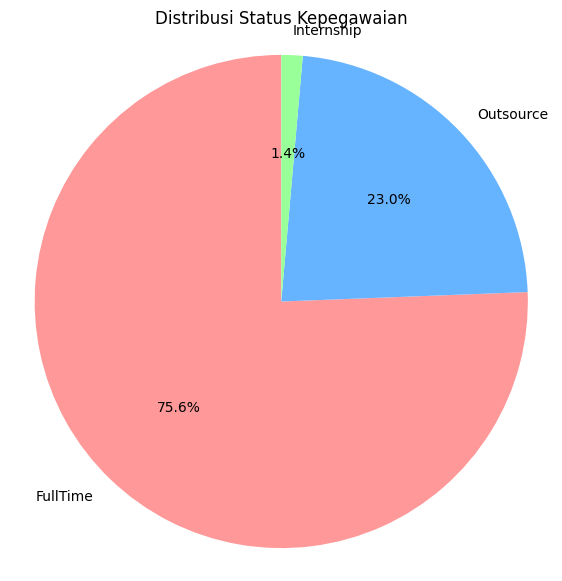

In [ ]:
# Menghitung distribusi kolom 'Status Kepegawaian'
distribusi_Status_Kepegawaian = df['StatusKepegawaian'].value_counts()

# Membuat pie chart distribusi
plt.figure(figsize=(7,7))
plt.pie(distribusi_Status_Kepegawaian, labels=distribusi_Status_Kepegawaian.index, autopct='%1.1f%%', startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribusi Status Kepegawaian')
plt.axis('equal')  # Rasio aspek yang sama memastikan bahwa pai digambar sebagai lingkaran.

# Menyimpan gambar
plt.savefig('Distribusi Status Kepegawaian.png', dpi=300, bbox_inches='tight')
# Menampilkan pie chart
plt.show()


In [ ]:
from google.colab import files
files.download('Distribusi Status Kepegawaian.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Full-time (75,6%): Ini adalah kategori terbesar, yang berarti mayoritas karyawan dalam perusahaan tersebut memiliki status sebagai karyawan tetap dengan jam kerja penuh dengan jumlah pegawai sebesar 217 pegawai.
Outsource (23%): Kategori ini menunjukkan bahwa sekitar 23% dari total karyawan adalah karyawan outsourcing, yaitu karyawan yang bekerja melalui perusahaan penyedia jasa tenaga kerja (outsourcing) dengan jumlah pegawai sebesar 66 pegawai.
Internship (1,4%): Kategori terkecil ini menunjukkan bahwa hanya sebagian kecil dari total karyawan yang berstatus sebagai intern atau peserta magang dengan jumlah pegawai sebesar 4 pegawai.

Apakah ada bulan tertentu yang memiliki lonjakan terjadinya karyawan resign?

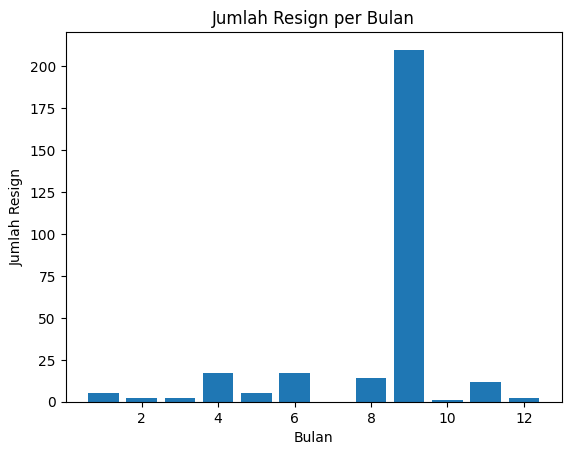

In [ ]:
# Buat kolom 'bulan' dari kolom 'TanggalResign'
df['bulan'] = df['TanggalResign'].dt.month

# Kelompokkan data berdasarkan bulan dan hitung jumlah resign
resign_per_bulan = df.groupby('bulan').size().reset_index(name='jumlah_resign')

plt.bar(resign_per_bulan['bulan'], resign_per_bulan['jumlah_resign'])
plt.xlabel('Bulan')
plt.ylabel('Jumlah Resign')
plt.title('Jumlah Resign per Bulan')

# Menyimpan gambar boxplot
plt.savefig('Jumlah Resign per Bulan.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from google.colab import files
files.download('Jumlah Resign per Bulan.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Terlihat bahwa ada satu bulan di mana jumlah resign sangat tinggi dibandingkan dengan bulan-bulan lainnya, yaitu bulan ke-9 (September). Jumlah resign di bulan tersebut mencapai lebih dari 200 karyawan.
Selain bulan ke-9, jumlah resign di bulan-bulan lain relatif kecil, dengan mayoritas bulan memiliki kurang dari 25 resign.
Kenaikan yang signifikan pada bulan ke-9 dapat dianggap sebagai outlier atau kejadian yang tidak umum, mengindikasikan ada faktor tertentu di bulan ini yang menyebabkan lonjakan resign.

Apakah ada perbedaan signifikan dalam jumlah karyawan berdasarkan status pernikahan?


StatusPernikahan
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: count, dtype: int64


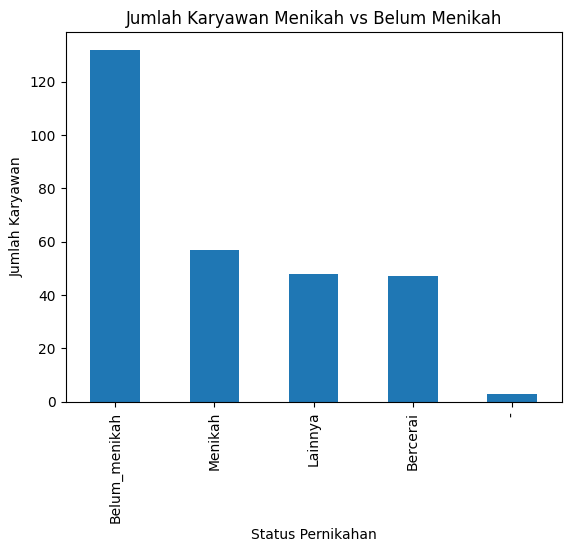

In [ ]:
# Hitung jumlah karyawan yang sudah menikah dan belum menikah
status_pernikahan = df['StatusPernikahan'].value_counts()

# Cetak hasil
print(status_pernikahan)

status_pernikahan.plot(kind='bar')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah Karyawan')
plt.title('Jumlah Karyawan Menikah vs Belum Menikah')

# Menyimpan gambar
plt.savefig('Jumlah Karyawan Menikah vs Belum Menikah.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
files.download('Jumlah Karyawan Menikah vs Belum Menikah.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sebagian besar karyawan (sekitar 120 orang) belum menikah. Ini menunjukkan bahwa mayoritas karyawan berada pada usia produktif awal atau mungkin lebih memilih untuk fokus pada karier sebelum menikah.
Jumlah karyawan yang sudah menikah sekitar 60 orang. Ini adalah jumlah yang cukup signifikan, menunjukkan bahwa ada proporsi yang cukup besar dari karyawan yang sudah memiliki komitmen pernikahan.
Kategori "lainnya" dan "bercerai" memiliki jumlah yang jauh lebih sedikit dibandingkan dengan kategori "belum menikah" dan "menikah". Ini mengindikasikan bahwa jumlah karyawan dengan status pernikahan yang tidak biasa ini relatif kecil dalam perusahaan.

Bagaimana distribusi jenis kelamin karyawan?

JenisKelamin
Wanita    167
Pria      120
Name: count, dtype: int64


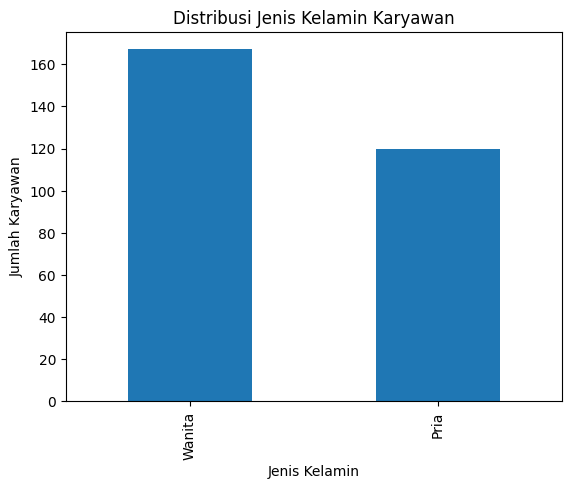

In [ ]:
# Hitung jumlah karyawan berdasarkan jenis kelamin
distribusi_jenis_kelamin = df['JenisKelamin'].value_counts()

# Cetak hasil
print(distribusi_jenis_kelamin)

distribusi_jenis_kelamin.plot(kind='bar')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Karyawan')
plt.title('Distribusi Jenis Kelamin Karyawan')

# Menyimpan gambar
plt.savefig('Distribusi Jenis Kelamin Karyawan.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
files.download('Distribusi Jenis Kelamin Karyawan.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Jumlah karyawan wanita lebih banyak dibandingkan dengan karyawan pria. Terlihat jelas bahwa batang yang mewakili jumlah karyawan wanita jauh lebih tinggi yaitu 167 pegawai daripada batang yang mewakili karyawan pria yaitu 120 pegawai.
Perbedaan jumlah yang signifikan ini mengindikasikan bahwa mayoritas karyawan adalah perempuan.

Berapa banyak karyawan di masing-masing tingkat pendidikan?

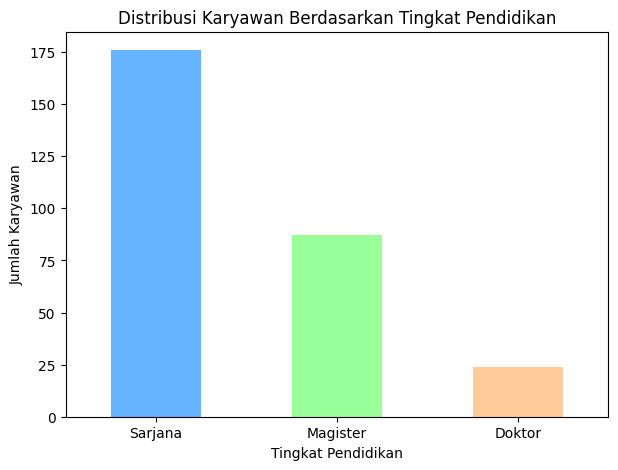

In [ ]:
# Menghitung distribusi karyawan berdasarkan tingkat pendidikan
distribusi_TingkatPendidikan = df['TingkatPendidikan'].value_counts()

# Membuat bar chart distribusi
plt.figure(figsize=(7,5))
distribusi_TingkatPendidikan.plot(kind='bar', color=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'])
plt.title('Distribusi Karyawan Berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Karyawan')
plt.xticks(rotation=0)

# Menyimpan gambar
plt.savefig('distribusi_TingkatPendidikan.png', dpi=300, bbox_inches='tight')

# Menampilkan bar chart
plt.show()

In [ ]:
files.download('distribusi_TingkatPendidikan.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mayoritas karyawan (175 orang) memiliki gelar sarjana. Ini mengindikasikan bahwa perusahaan cenderung merekrut karyawan dengan kualifikasi akademik minimal S1.
Jumlah karyawan dengan gelar magister cukup signifikan (sekitar 85 orang). Ini menunjukkan bahwa perusahaan juga menghargai karyawan dengan pendidikan pascasarjana.
Jumlah karyawan dengan gelar doktor paling sedikit (sekitar 25 orang). Ini mungkin karena posisi yang membutuhkan kualifikasi doktoral relatif lebih sedikit atau persyaratan khusus lainnya yang membatasi jumlah kandidat.

Apakah terdapat hubungan yang signifikan antara tingkat pendidikan dengan kinerja karyawan?


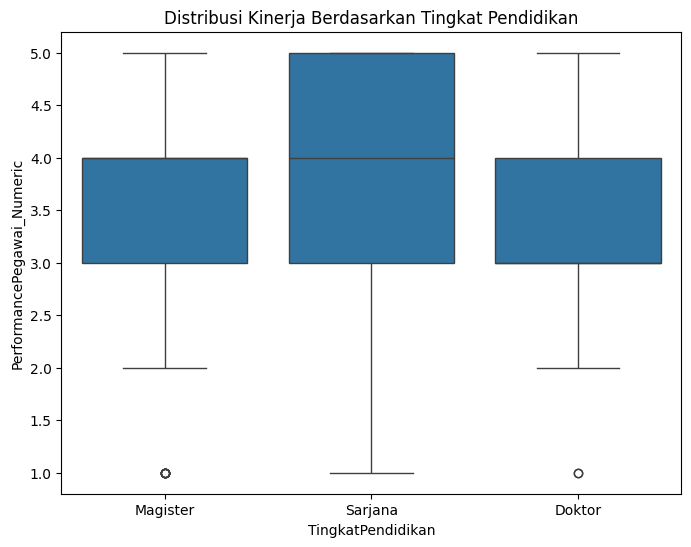

Hasil Uji ANOVA: F_onewayResult(statistic=0.6618331224406504, pvalue=0.5166985947818199)
Tidak ada hubungan signifikan antara tingkat pendidikan dan kinerja.


In [ ]:
# Visualisasi data dengan boxplot untuk melihat distribusi kinerja di setiap tingkat pendidikan
plt.figure(figsize=(8,6))
sns.boxplot(x='TingkatPendidikan', y='PerformancePegawai_Numeric', data=df)
plt.title('Distribusi Kinerja Berdasarkan Tingkat Pendidikan')

# Menyimpan gambar
plt.savefig('Distribusi Kinerja Berdasarkan Tingkat Pendidikan.png', dpi=300, bbox_inches='tight')
plt.show()

# Uji ANOVA untuk melihat hubungan signifikan antara tingkat pendidikan dengan kinerja
anova_result = stats.f_oneway(
    df[df['TingkatPendidikan'] == 'Sarjana']['PerformancePegawai_Numeric'],
    df[df['TingkatPendidikan'] == 'Magister']['PerformancePegawai_Numeric'],
    df[df['TingkatPendidikan'] == 'Doktor']['PerformancePegawai_Numeric'],
)

# Menampilkan hasil ANOVA
print('Hasil Uji ANOVA:', anova_result)

# Jika p-value < 0.05, ada hubungan yang signifikan
if anova_result.pvalue < 0.05:
    print("Ada hubungan signifikan antara tingkat pendidikan dan kinerja.")
else:
    print("Tidak ada hubungan signifikan antara tingkat pendidikan dan kinerja.")

In [ ]:
files.download('Distribusi Kinerja Berdasarkan Tingkat Pendidikan.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sarjana: Karyawan dengan gelar sarjana memiliki rentang kinerja yang paling luas, dengan nilai maksimum yang tinggi. Ini menunjukkan bahwa ada beberapa karyawan sarjana dengan kinerja sangat baik, tetapi juga ada beberapa yang kurang baik.
Magister: Karyawan magister memiliki kinerja yang cukup baik, dengan median yang sedikit lebih tinggi dibandingkan dengan karyawan sarjana. Namun, rentang kinerjanya lebih sempit, yang mengindikasikan tingkat konsistensi kinerja yang lebih tinggi.
Doktor: Karyawan doktor memiliki kinerja yang cukup baik, dengan median yang mirip dengan karyawan magister. Namun, terdapat beberapa outlier (nilai ekstrem) yang cukup jauh dari rentang data lainnya.
Kemudian dilakukan uji anova dengan hasil Karena p-value (0.5167) lebih besar dari 0.05, kita gagal menolak hipotesis nol. Artinya, tidak ada bukti yang cukup untuk menyatakan bahwa ada perbedaan yang signifikan secara statistik antara kinerja karyawan berdasarkan tingkat pendidikan.

Bagaimana distribusi karyawan di berbagai jenis pekerjaan?

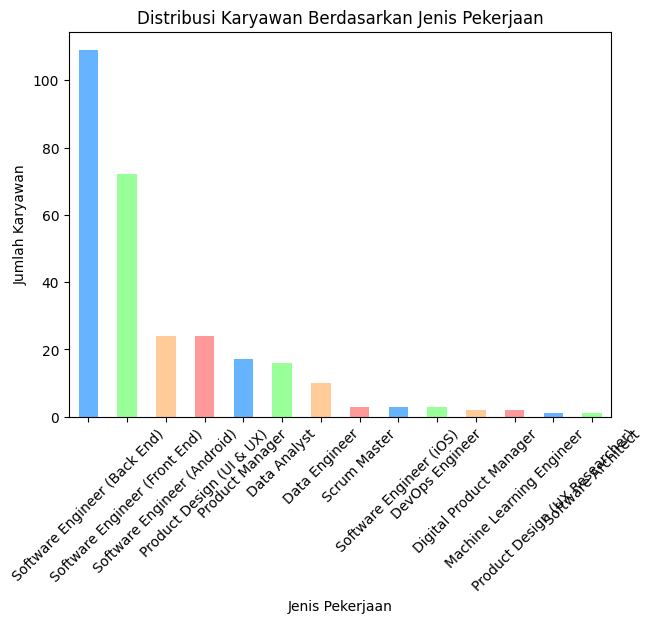

In [ ]:
# Menghitung distribusi karyawan berdasarkan jenis pekerjaan
distribusi_pekerjaan = df['Pekerjaan'].value_counts()

# Membuat bar chart distribusi
plt.figure(figsize=(7,5))
distribusi_pekerjaan.plot(kind='bar', color=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'])
plt.title('Distribusi Karyawan Berdasarkan Jenis Pekerjaan')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Jumlah Karyawan')
plt.xticks(rotation=45)

# Menyimpan gambar
plt.savefig('dDistribusi Karyawan Berdasarkan Jenis Pekerjaan.png', dpi=300, bbox_inches='tight')

# Menampilkan bar chart
plt.show()


In [ ]:
files.download('dDistribusi Karyawan Berdasarkan Jenis Pekerjaan.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Pekerjaan dengan jumlah karyawan terbanyak adalah Software Engineer (Back End). Ini mengindikasikan bahwa perusahaan memiliki kebutuhan yang besar akan tenaga ahli di bidang pengembangan perangkat lunak bagian belakang.
Pekerjaan Software Engineer (Front End) juga memiliki jumlah karyawan yang cukup signifikan. Ini menunjukkan bahwa perusahaan juga fokus pada pengembangan tampilan depan (user interface) dari produk atau layanan mereka.
Pekerjaan lain seperti Product Designer, Data Analyst, dan Data Engineer juga memiliki jumlah karyawan yang cukup banyak. Ini menunjukkan bahwa perusahaan memperhatikan aspek desain produk, analisis data, dan pengelolaan data dalam operasionalnya.
Beberapa jenis pekerjaan memiliki jumlah karyawan yang relatif sedikit, seperti Scrum Master, DevOps Engineer, dan Machine Learning Engineer. Ini mungkin karena kebutuhan akan posisi-posisi tersebut lebih spesifik atau jumlah proyek yang terkait dengan peran tersebut masih terbatas.

Apa saja alasan utama karyawan memutuskan untuk resign?

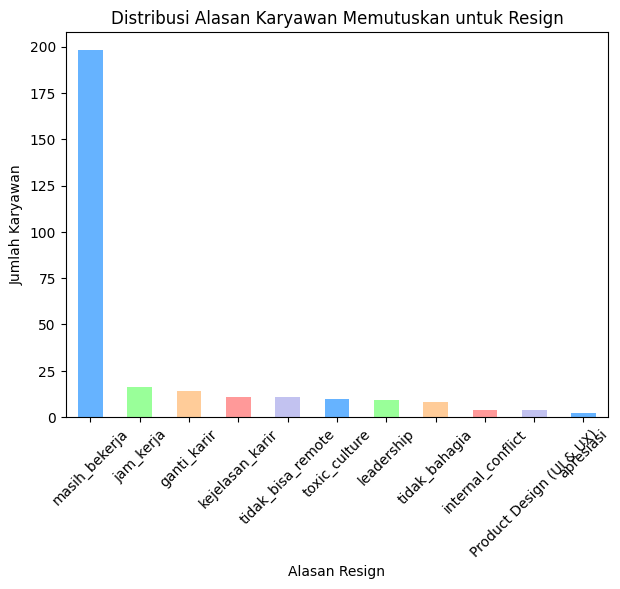

In [ ]:
# Menghitung distribusi alasan resign
distribusi_AlasanResign = df['AlasanResign'].value_counts()

# Membuat bar chart distribusi alasan resign
plt.figure(figsize=(7,5))
distribusi_AlasanResign.plot(kind='bar', color=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#c2c2f0'])
plt.title('Distribusi Alasan Karyawan Memutuskan untuk Resign')
plt.xlabel('Alasan Resign')
plt.ylabel('Jumlah Karyawan')
plt.xticks(rotation=45)

# Menyimpan gambar
plt.savefig('Distribusi Alasan Karyawan Memutuskan untuk Resign.png', dpi=300, bbox_inches='tight')

# Menampilkan bar chart
plt.show()

In [ ]:
files.download('Distribusi Alasan Karyawan Memutuskan untuk Resign.png')

Alasan Utama: Alasan utama karyawan resign adalah karena masih bekerja di perusahaan (terlihat dari batang paling tinggi). Alasan Populer Lainnya: Selain alasan "masih bekerja", alasan-alasan lain yang cukup sering disebutkan adalah "jam kerja" dan "ganti karier". Ini menunjukkan bahwa beban kerja yang tinggi dan keinginan untuk mengejar peluang baru merupakan faktor pendorong utama karyawan untuk resign.
Faktor Budaya Perusahaan: Alasan seperti "toxic culture" dan "leadership" menunjukkan bahwa kondisi kerja yang tidak sehat dan kepemimpinan yang buruk juga menjadi penyebab karyawan memutuskan untuk pergi.
Faktor Lainnya: Alasan seperti "kejelasan karier", "tidak bisa remote", "internal conflict", dan "tidak bahagia" juga memberikan gambaran bahwa kurangnya kepastian karir, fleksibilitas kerja, konflik internal, dan ketidakpuasan dengan pekerjaan secara umum dapat mendorong karyawan untuk resign.

Dari visualisasi ini dapat disimpulkan bahwa alasan karyawan resign sangat beragam, namun secara umum dapat dikelompokkan menjadi beberapa kategori utama:

    Beban Kerja: Jam kerja yang panjang dan tidak seimbang menjadi salah satu faktor utama.
    Kepuasan Kerja: Kurangnya kepuasan terhadap pekerjaan, baik dari segi gaji, jenjang karier, maupun lingkungan kerja, juga menjadi penyebab utama.
    Kondisi Perusahaan: Budaya perusahaan yang toxic, kepemimpinan yang buruk, dan ketidakjelasan akan masa depan perusahaan juga mendorong karyawan untuk mencari pekerjaan baru.

Bagaimana distribusi alasan resign berdasarkan status pernikahan?

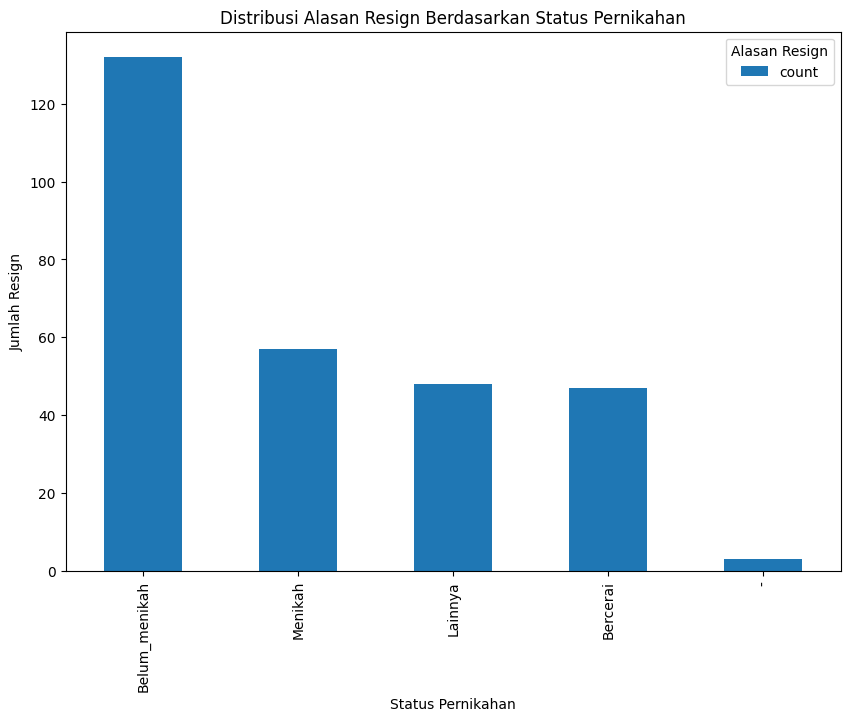

In [ ]:
# Visualisasi distribusi alasan resign berdasarkan status pernikahan
status_pernikahan.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Distribusi Alasan Resign Berdasarkan Status Pernikahan')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah Resign')
plt.legend(title='Alasan Resign')
plt.show()


Bagaimana distribusi alasan resign berdasarkan Usia?

<ipython-input-47-59c79c7a6141>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribusi_usia_pegawai = df.groupby(['usia_rentang_pegawai', 'AlasanResign']).size().unstack().fillna(0)


<Figure size 1200x800 with 0 Axes>

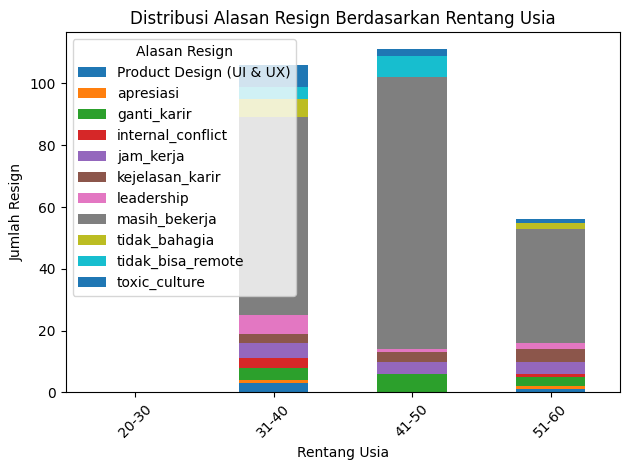

In [ ]:
# Fungsi untuk menghitung usia
def hitung_usia_pegawai(TanggalLahir):
    lahir = datetime.strptime(TanggalLahir, '%Y-%m-%d')
    hari_ini = datetime.now()
    usia_pegawai = hari_ini.year - lahir.year - ((hari_ini.month, hari_ini.day) < (lahir.month, lahir.day))
    return usia_pegawai

# Terapkan fungsi ke kolom Tanggal_Lahir
df['usia_pegawai'] = df['TanggalLahir'].apply(hitung_usia_pegawai)

# Menambahkan kolom rentang usia
df['usia_rentang_pegawai'] = pd.cut(df['usia_pegawai'], bins=[20, 30, 40, 50, 60], labels=['20-30', '31-40', '41-50', '51-60'])

# Menghitung distribusi alasan resign berdasarkan rentang usia
distribusi_usia_pegawai = df.groupby(['usia_rentang_pegawai', 'AlasanResign']).size().unstack().fillna(0)



# Visualisasi distribusi alasan resign berdasarkan rentang usia
plt.figure(figsize=(12, 8))
distribusi_usia_pegawai.plot(kind='bar', stacked=True)
plt.title('Distribusi Alasan Resign Berdasarkan Rentang Usia')
plt.xlabel('Rentang Usia')
plt.ylabel('Jumlah Resign')
plt.legend(title='Alasan Resign')
plt.xticks(rotation=45)
plt.tight_layout()

# Menyimpan gambar
plt.savefig('Distribusi Alasan Resign Berdasarkan Rentang Usia.png', dpi=300, bbox_inches='tight')

plt.show()



In [ ]:
files.download('Distribusi Alasan Resign Berdasarkan Rentang Usia.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Apa saja alasan resign pegawai berdasarkan PerformancePegawai?

<Figure size 1200x1000 with 0 Axes>

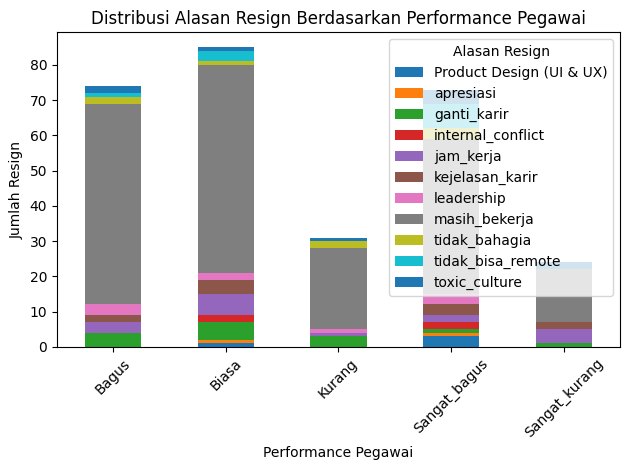

In [ ]:
# Menghitung distribusi alasan resign berdasarkan PerformancePegawai
distribusi_PerformancePegawai = df.groupby(['PerformancePegawai', 'AlasanResign']).size().unstack().fillna(0)

# Visualisasi distribusi alasan resign berdasarkan PerformancePegawai
plt.figure(figsize=(12, 10))
distribusi_PerformancePegawai.plot(kind='bar', stacked=True)
plt.title('Distribusi Alasan Resign Berdasarkan Performance Pegawai')
plt.xlabel('Performance Pegawai')
plt.ylabel('Jumlah Resign')
plt.legend(title='Alasan Resign')
plt.xticks(rotation=45)
plt.tight_layout()

# Menyimpan gambar
plt.savefig('Distribusi Alasan Resign Berdasarkan Performance Pegawai.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
files.download('Distribusi Alasan Resign Berdasarkan Performance Pegawai.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Karyawan dengan kinerja "Biasa" dan "Kurang": Cenderung lebih banyak resign karena alasan "jam kerja", "tidak bahagia", dan "toxic culture". Ini menunjukkan bahwa beban kerja yang tinggi, ketidakpuasan dengan pekerjaan, dan lingkungan kerja yang tidak sehat menjadi faktor pendorong utama bagi karyawan dengan kinerja menengah ke bawah.




<Figure size 1200x800 with 0 Axes>

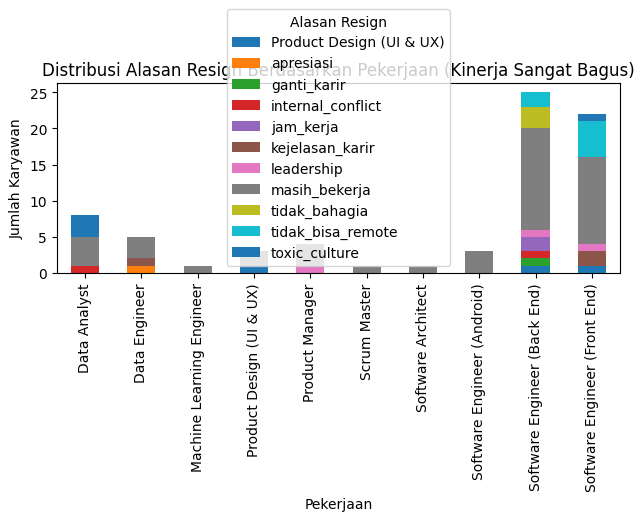

In [ ]:
# Filter data untuk karyawan dengan kinerja sangat bagus
kinerja_sangat_bagus = df[df['PerformancePegawai'] == 'Sangat_bagus']
# Filter berdasarkan pekerjaan
pekerjaan = kinerja_sangat_bagus[kinerja_sangat_bagus['Pekerjaan'] == 'Software Engineer (Back End)']
# Melihat alasan resign dari karyawan dengan kinerja sangat bagus
alasan_resign_pekerjaan = pekerjaan['AlasanResign'].value_counts()


# Distribusi alasan resign untuk semua pekerjaan
distribusi_alasan = kinerja_sangat_bagus.groupby('Pekerjaan')['AlasanResign'].value_counts().unstack().fillna(0)

# Visualisasi
plt.figure(figsize=(12, 8))
distribusi_alasan.plot(kind='bar', stacked=True)
plt.title('Distribusi Alasan Resign Berdasarkan Pekerjaan (Kinerja Sangat Bagus)')
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah Karyawan')
plt.legend(title='Alasan Resign')
plt.tight_layout()

# Menyimpan gambar
plt.savefig('Distribusi Alasan Resign Berdasarkan Pekerjaan (Kinerja Sangat Bagus).png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
from google.colab import files
files.download('Distribusi Alasan Resign Berdasarkan Pekerjaan (Kinerja Sangat Bagus).png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Karyawan dengan kinerja sangat bagus cenderung lebih banyak resign karena alasan tidak bisa remote, toxic culture dalam perusahaan dan masalah leadership. Ini menunjukkan bahwa kebijakan yang membatasi kerja dari rumah, Kepemimpinan yang buruk, dan lingkungan kerja yang tidak sehat menjadi faktor pendorong utama bagi karyawan dengan kinerja sangat bagus.


